## The Data: Pima Indian Classification

### Problem statement 
Using the UCI PIMA Indian Diabetes dataset to predict a person has diabetes or not using the medical attributes provided. (Target is column 8)

### Assumptions

This is enough data to split and reliably predict if the patient has diabetes, the dataset has only 786 data points
Just these attributes are enough to diagnose the ailment
Similar Problems 
This is very much like some common 2 class classification problems like classifying mail into spam and ham based on the contents of the email. Obviously the attributes there would be strings and not numbers like this dataset, therefore the way in which we process at least some of the features will be different.

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("../data/pima-indians-diabetes.data",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X=df[np.arange(8)]
y=df[8]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors=6)

In [7]:
clf1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(y_test,clf1.predict(X_test))

0.7125984251968503

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
clf1 = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=6),
                    param_grid={"n_neighbors":np.arange(1,50)},)
clf1.fit(X,y)
clf1.best_params_

{'n_neighbors': 8}

In [12]:
clf1.best_score_

0.7552083333333334

In [13]:
accuracy_score(y_test,clf1.predict(X_test))

0.7559055118110236

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(KNeighborsClassifier(n_neighbors=1),X,y).mean()

0.6719325789654382

In [16]:
from ipywidgets import interact

In [17]:
@interact(k=10)
def show(k):
    print(cross_val_score(KNeighborsClassifier(n_neighbors=k),X,y).mean())

interactive(children=(IntSlider(value=10, description='k', max=30, min=-10), Output()), _dom_classes=('widget-interact',))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [19]:
clf2 = GridSearchCV(DecisionTreeClassifier(max_depth=4),
                   param_grid={"max_depth":np.arange(1,10)})
clf3 = GridSearchCV(SVC(kernel="poly"),
                   param_grid={"C":[10,100],"degree":np.arange(1)},
                   verbose=10)

In [20]:
clf2.fit(X,y)
clf2.best_score_

0.73828125

In [21]:
clf3.fit(X,y)
clf3.best_score_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.6498054474708171, total=   0.0s
[CV] C=10, degree=0 ..................................................
[CV] ................. C=10, degree=0, score=0.65234375, total=   0.0s
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.6509803921568628, total=   0.0s
[CV] C=100, degree=0 .................................................
[CV] ........ C=100, degree=0, score=0.6498054474708171, total=   0.0s
[CV] C=100, degree=0 .................................................
[CV] ................ C=100, degree=0, score=0.65234375, total=   0.0s
[CV] C=100, degree=0 .................................................
[CV] ........ C=100, degree=0, score=0.6509803921568628, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


0.6510416666666666

In [23]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()

In [26]:
cross_val_score(clf3,X,y).mean()

0.7695899813394877

In [24]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[("tree",clf2),
                                   ("kn",clf1),
                                   ("lr",clf3)])

In [25]:
cross_val_score(eclf,X,y).mean()

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7539342248734773

In [27]:
## Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier

In [35]:
bclf = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100,oob_score=True)

In [36]:
cross_val_score(bclf,X,y,cv=10).mean()

0.769565960355434

In [37]:
bclf.fit(X,y)
bclf.oob_score_

0.7682291666666666

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rclf = RandomForestClassifier(max_depth=5,oob_score=True)
rclf.fit(X,y)

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [49]:
rclf.oob_score_

0.7434895833333334

In [50]:
rclf.feature_importances_

array([0.08774972, 0.32286427, 0.04219531, 0.03100651, 0.0499003 ,
       0.25374288, 0.08483358, 0.12770743])

In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


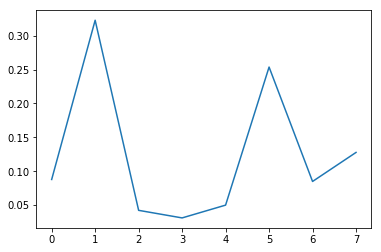

In [54]:
plt.plot(rclf.feature_importances_)

In [55]:
X2 = df[[1,5]].values

In [56]:
rclf2 = RandomForestClassifier(max_depth=5,oob_score=True)
rclf2.fit(X2,y)

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [57]:
rclf2.oob_score_

0.7526041666666666

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
aclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=20)

In [61]:
cross_val_score(aclf,X,y).mean()

0.7435580502466875